<a href="https://colab.research.google.com/github/yarkalm/def_metallization/blob/main/%D0%90%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%22Metallurg2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from itertools import product

import sklearn
from tensorflow import keras
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras import metrics
import tensorflow as tf

# Загрузка и преобразование датасета

In [ ]:
df = pd.read_excel('/content/Датасет_металлург.xlsx')



input_data = df[["CO2","CO","H2","Herm","Magn","Temp","Time","m before","m after"]]
output_data = df[["RedDegr"]]

input_data

,CO2,CO,H2,Herm,Magn,Temp,Time,m before,m after
0,80.0,20.0,0.0,0.0,100.0,750,15.0,0.4691,0.3981
1,80.0,20.0,0.0,0.0,100.0,750,30.0,0.4572,0.4126
2,80.0,20.0,0.0,0.0,100.0,750,60.0,0.4682,0.3997
3,80.0,20.0,0.0,0.0,100.0,750,90.0,0.4401,0.3679
4,80.0,20.0,0.0,0.0,100.0,750,120.0,0.4486,0.3715
...,...,...,...,...,...,...,...,...,...
657,76.5,23.0,0.5,0.0,100.0,750,90.0,0.4862,0.4074
658,76.5,23.0,0.5,0.0,100.0,750,120.0,0.4783,0.3926
659,76.5,23.0,0.5,0.0,100.0,750,15.0,0.4766,0.4383
660,76.5,23.0,0.5,0.0,100.0,750,30.0,0.4926,0.4208


Разделение на входные и выходные значения

In [ ]:
x = []
y = []
for i in range(len(input_data)):
  tmp = []
  for j in range(len(input_data.iloc[i])):
    tmp.append(np.asarray(input_data.iloc[i].tolist()[j]))
    

  x.append(np.asarray(tmp).astype(np.float32))
  y.append(np.asarray(output_data.iloc[i]/100).astype(np.float32))

Стандартизация данных

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)
#normalizer = preprocessing.Normalizer().fit(x_train)

#x_train = normalizer.transform(x_train)
x_train = np.array(x_train)
x_test = np.array(x_test)
means = x_test.mean(axis=0,dtype=(np.float32))
std = x_test.std(axis=0)
#x_test = normalizer.transform(x_test)
print('Тестовая выборка')
print('Все данные имеют среднее по столбцу: ',*np.round(means,3))
print('Все данные имеют дисперсию по столбцу: ',*np.round(std,3))
pd.DataFrame().append({"CO2":means[0],"CO":means[1],"H2":means[2],"Herm":means[3],"Magn":means[4],"Temp":means[5],"Time":means[6],"m before":means[7],"m after":means[8]},ignore_index=True).append({"CO2":std[0],"CO":std[1],"H2":std[2],"Herm":std[3],"Magn":std[4],"Temp":std[5],"Time":std[6],"m before":std[7],"m after":std[8]},ignore_index=True)

Тестовая выборка
Все данные имеют среднее по столбцу:  58.389 27.328 7.018 3.762 96.238 778.639 61.807 0.496 0.433
Все данные имеют дисперсию по столбцу:  31.357 20.619 20.415 16.314 16.314 39.679 41.031 0.018 0.031


,CO2,CO,H2,Herm,Magn,Temp,Time,m before,m after
0,58.388554,27.328314,7.018072,3.762048,96.237953,778.638550,61.807228,0.496057,0.433015
1,31.357454,20.619005,20.414810,16.314455,16.314455,39.679173,41.031189,0.017577,0.031162


In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print('Тестовая выборка')
print('Все данные имеют среднее по столбцу: ',np.round_(x_test.mean(axis=0,dtype=(np.float32)),6))
print('Все данные имеют дисперсию по столбцу: ',x_test.std(axis=0))
pd.DataFrame(data = y_test)

Тестовая выборка
Все данные имеют среднее по столбцу:  [ 0.  0. -0. -0.  0. -0. -0.  0.  0.]
Все данные имеют дисперсию по столбцу:  [0.99999994 1.0000002  0.9999998  1.0000006  1.0000006  1.0000002
 1.0000002  1.         1.0000001 ]


,0
0,0.480000
1,0.693677
2,0.722300
3,0.208600
4,0.279500
...,...
161,0.173700
162,0.636700
163,0.669716
164,0.772100


# Подбор лучших параметров для ИНС

Словарь различных параметров для ИНС

In [ ]:
par = {'layer_1': ['tanh','sigmoid','relu'],
          'layer_2': ['tanh','sigmoid','relu'],
          'layer_3': ['tanh','sigmoid','relu'],
          'layer_4': ['tanh','sigmoid','relu'],
          'layer_5': ['tanh','sigmoid','relu'],
          'epochs':[5,15,25],
          'opt': [keras.optimizers.SGD(0.1),keras.optimizers.Adam(0.1)]
          }

Список всех возможных комбинаций параметров

In [ ]:
combinations = list(product(*par.values()))
print("Количество различных комбинаций:",len(combinations))

Количество различных комбинаций: 1458


In [ ]:
combinations[69]   # Пример комбинации

('tanh',
 'tanh',
 'relu',
 'softmax',
 'exponential',
 15,
 <keras.optimizers.optimizer_v2.adam.Adam at 0x7ff1f6c44cd0>)

- Перебор различных комбинаций

---------------------------------------------------------------------
Variant #0


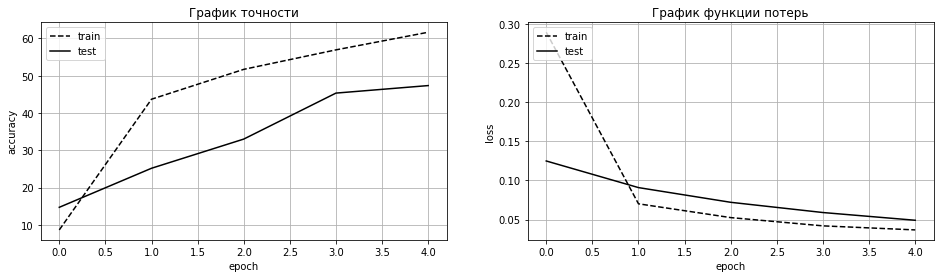

19/19 [==============================] - 0s 2ms/step - loss: 0.0372 - my_metric: 56.9222
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:tanh 
 epochs:5 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 56.92220628261566%



---------------------------------------------------------------------
Variant #1


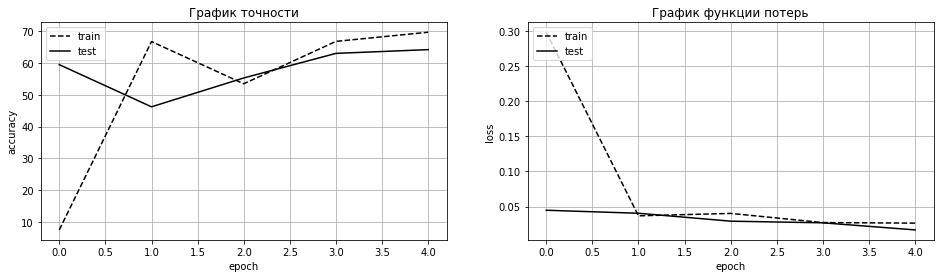

19/19 [==============================] - 0s 2ms/step - loss: 0.0229 - my_metric: 64.2903
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:tanh 
 epochs:5 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 64.29033875465393%



---------------------------------------------------------------------
Variant #2


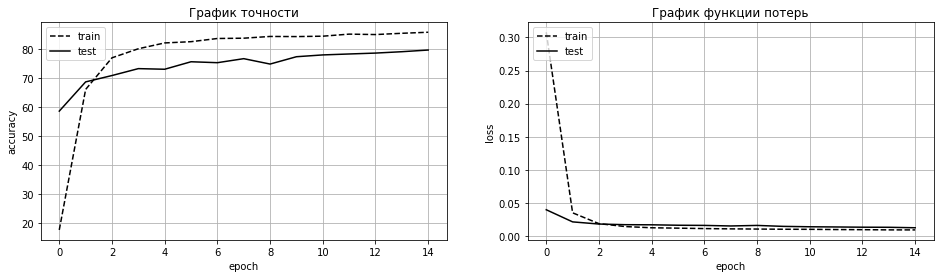

19/19 [==============================] - 0s 2ms/step - loss: 0.0061 - my_metric: 87.0996
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:tanh 
 epochs:15 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 87.09960281848907%



---------------------------------------------------------------------
Variant #3


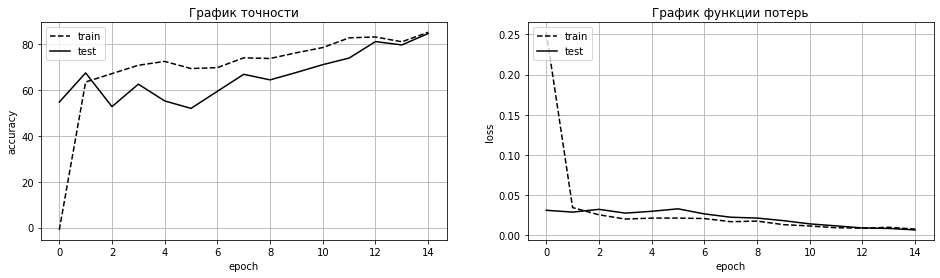

19/19 [==============================] - 0s 2ms/step - loss: 0.0060 - my_metric: 87.7617
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:tanh 
 epochs:15 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 87.76166290044785%



---------------------------------------------------------------------
Variant #4


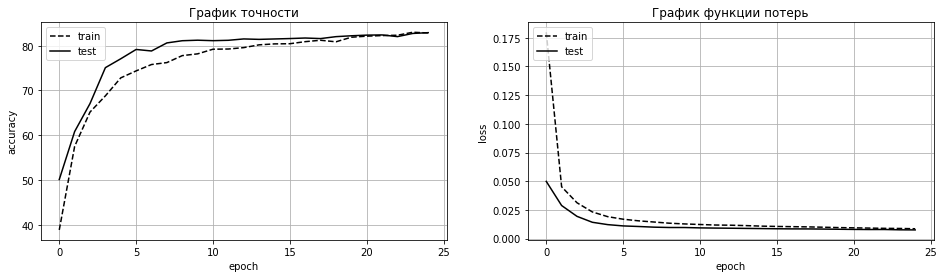

19/19 [==============================] - 0s 2ms/step - loss: 0.0093 - my_metric: 82.9406
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:tanh 
 epochs:25 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 82.94062465429306%



---------------------------------------------------------------------
Variant #5


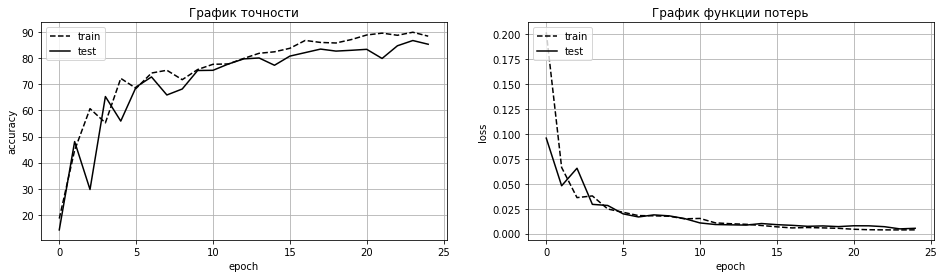

19/19 [==============================] - 0s 2ms/step - loss: 0.0042 - my_metric: 88.3175
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:tanh 
 epochs:25 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 88.3175365626812%



---------------------------------------------------------------------
Variant #6


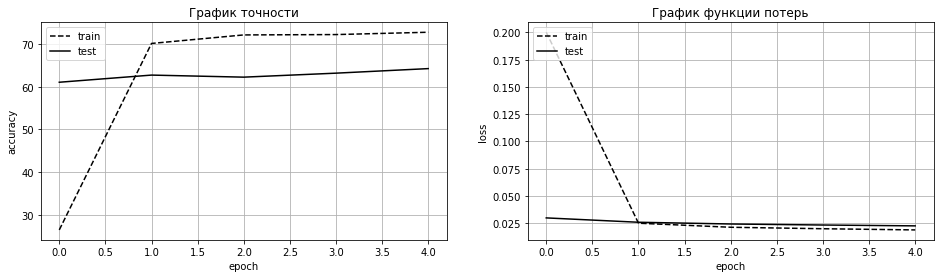

19/19 [==============================] - 0s 2ms/step - loss: 0.0182 - my_metric: 71.7013
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:exponential 
 epochs:5 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 71.70126438140869%



---------------------------------------------------------------------
Variant #7


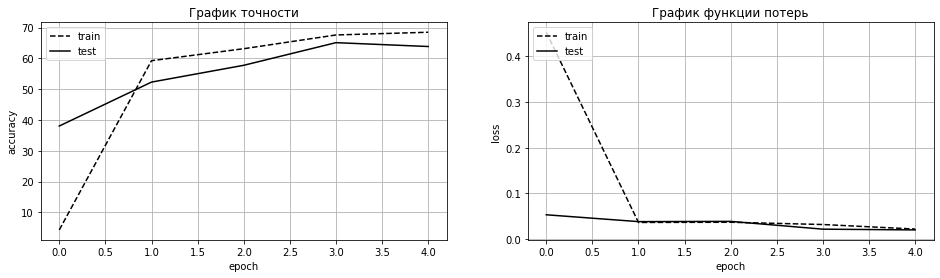

19/19 [==============================] - 0s 2ms/step - loss: 0.0229 - my_metric: 66.6202
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:exponential 
 epochs:5 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 66.62017107009888%



---------------------------------------------------------------------
Variant #8


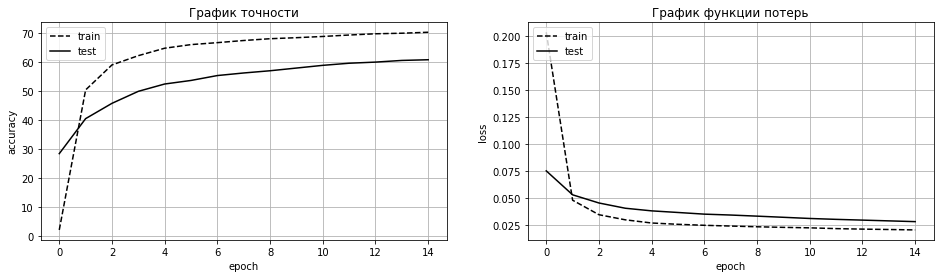

19/19 [==============================] - 0s 2ms/step - loss: 0.0198 - my_metric: 69.0054
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:exponential 
 epochs:15 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 69.0054327249527%



---------------------------------------------------------------------
Variant #9


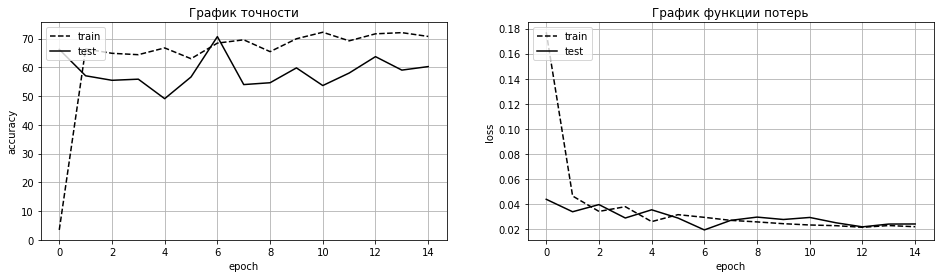

19/19 [==============================] - 0s 2ms/step - loss: 0.0163 - my_metric: 70.7121
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:exponential 
 epochs:15 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 70.71210145950317%



---------------------------------------------------------------------
Variant #10


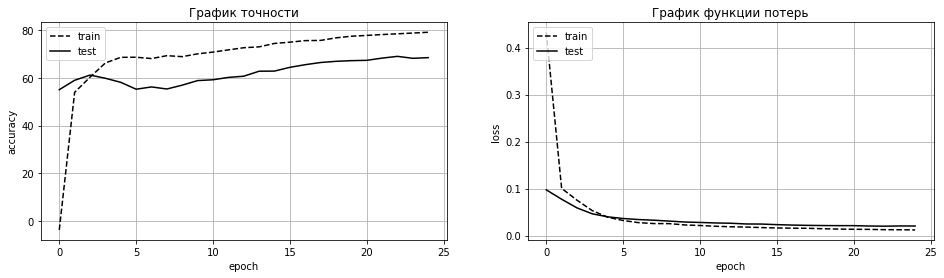

19/19 [==============================] - 0s 2ms/step - loss: 0.0120 - my_metric: 76.1853
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:exponential 
 epochs:25 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 76.18532329797745%



---------------------------------------------------------------------
Variant #11


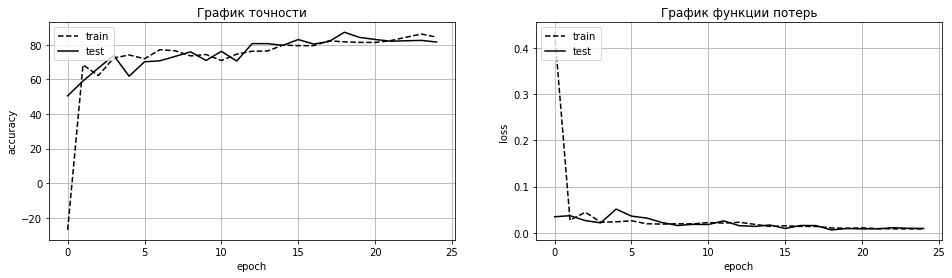

19/19 [==============================] - 0s 2ms/step - loss: 0.0110 - my_metric: 81.3641
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:tanh 
 layer 5:exponential 
 epochs:25 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 81.36405795812607%



---------------------------------------------------------------------
Variant #12


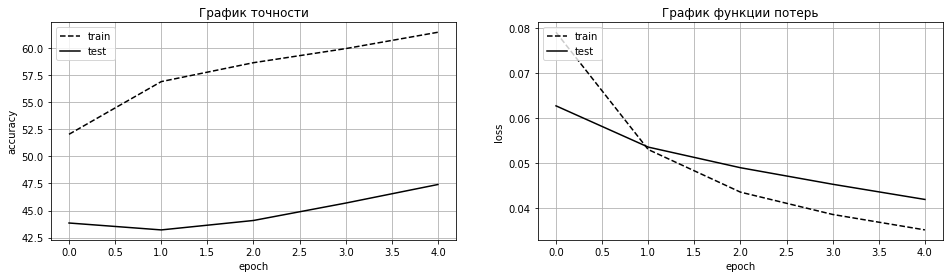

19/19 [==============================] - 0s 2ms/step - loss: 0.0363 - my_metric: 55.2840
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:tanh 
 epochs:5 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 55.28399050235748%



---------------------------------------------------------------------
Variant #13


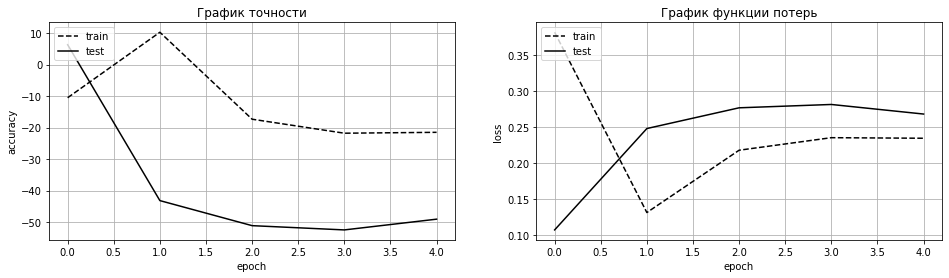

19/19 [==============================] - 0s 2ms/step - loss: 0.2454 - my_metric: -32.3138
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:tanh 
 epochs:5 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : -32.31383562088013%



---------------------------------------------------------------------
Variant #14


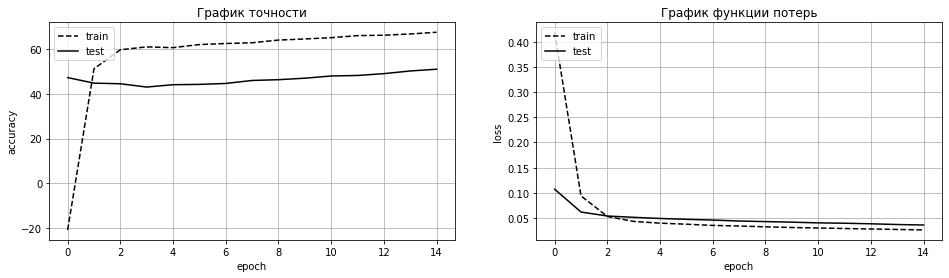

19/19 [==============================] - 0s 2ms/step - loss: 0.0254 - my_metric: 64.3528
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:tanh 
 epochs:15 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 64.35284316539764%



---------------------------------------------------------------------
Variant #15


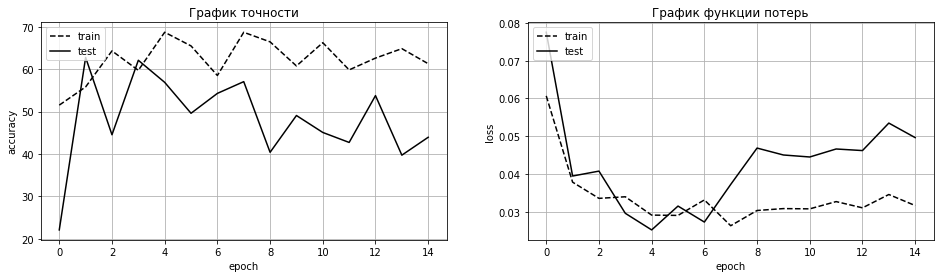

19/19 [==============================] - 0s 2ms/step - loss: 0.0290 - my_metric: 60.5666
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:tanh 
 epochs:15 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 60.566627979278564%



---------------------------------------------------------------------
Variant #16


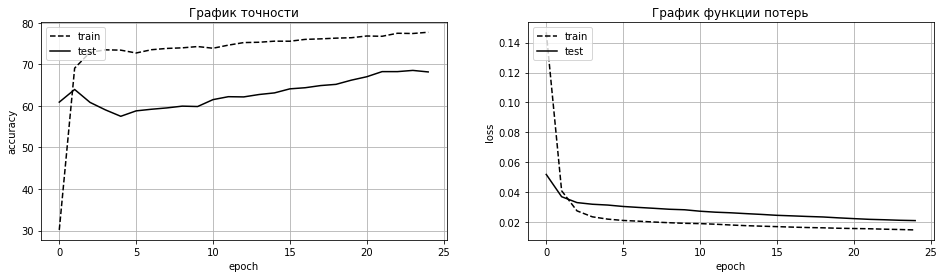

19/19 [==============================] - 0s 2ms/step - loss: 0.0123 - my_metric: 77.6542
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:tanh 
 epochs:25 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 77.65415608882904%



---------------------------------------------------------------------
Variant #17


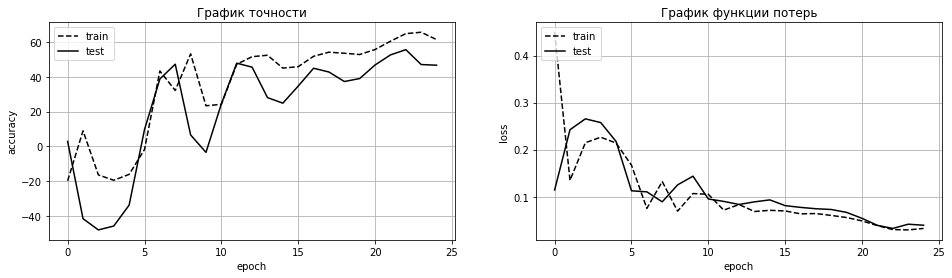

19/19 [==============================] - 0s 2ms/step - loss: 0.0320 - my_metric: 56.0615
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:tanh 
 epochs:25 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 56.06147646903992%



---------------------------------------------------------------------
Variant #18


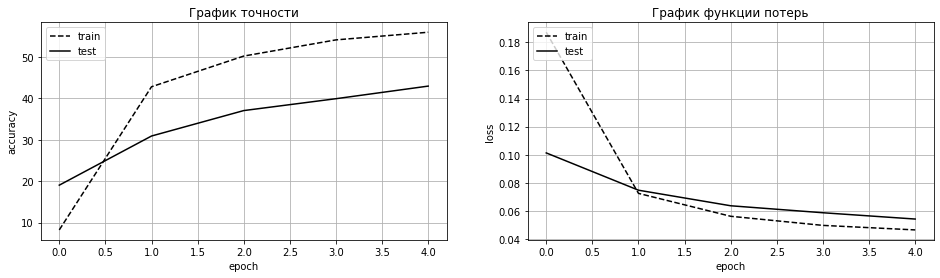

19/19 [==============================] - 0s 2ms/step - loss: 0.0478 - my_metric: 50.1795
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:exponential 
 epochs:5 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 50.17954707145691%



---------------------------------------------------------------------
Variant #19


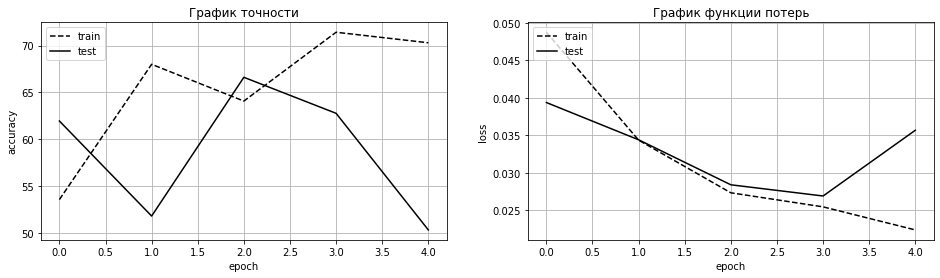

19/19 [==============================] - 0s 2ms/step - loss: 0.0216 - my_metric: 64.3810
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:exponential 
 epochs:5 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 64.3810361623764%



---------------------------------------------------------------------
Variant #20


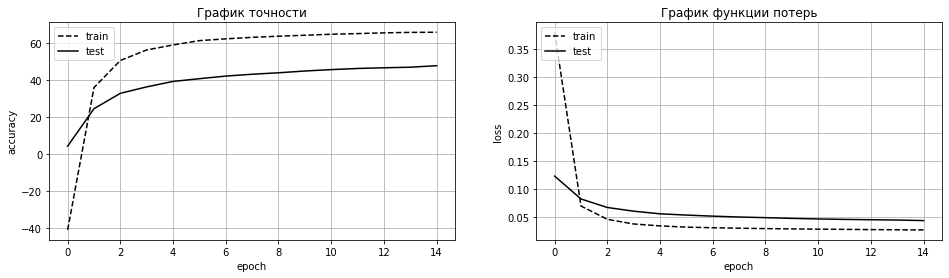

19/19 [==============================] - 0s 2ms/step - loss: 0.0296 - my_metric: 60.5026
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:exponential 
 epochs:15 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 60.50255596637726%



---------------------------------------------------------------------
Variant #21


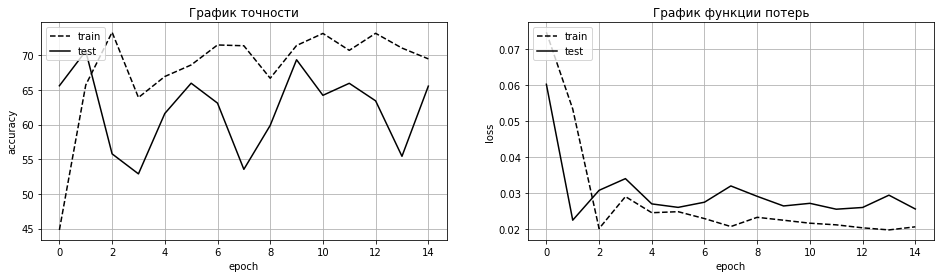

19/19 [==============================] - 0s 2ms/step - loss: 0.0172 - my_metric: 71.1949
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:exponential 
 epochs:15 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 71.1949348449707%



---------------------------------------------------------------------
Variant #22


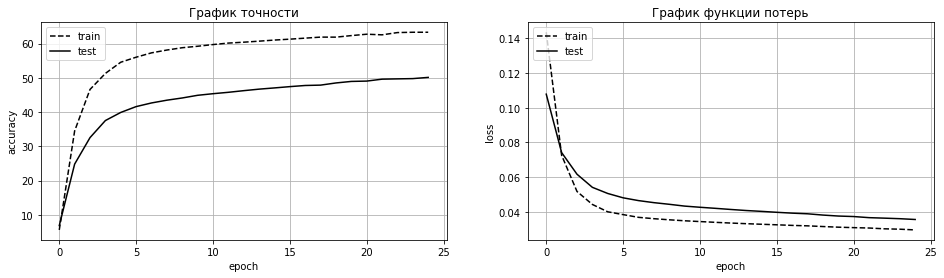

19/19 [==============================] - 0s 2ms/step - loss: 0.0311 - my_metric: 57.2862
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:exponential 
 epochs:25 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 57.286226749420166%



---------------------------------------------------------------------
Variant #23


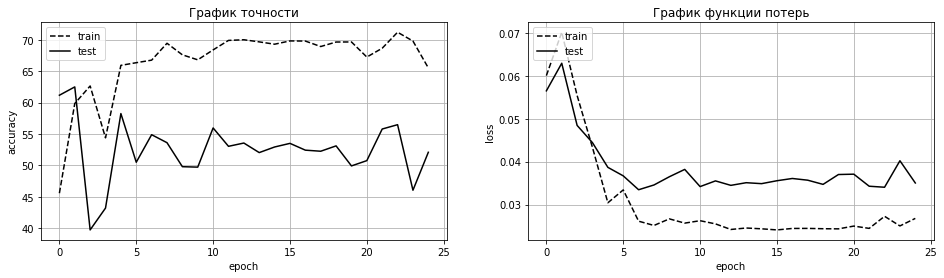

19/19 [==============================] - 0s 2ms/step - loss: 0.0219 - my_metric: 65.8661
 layer 1:tanh 
 layer 2:tanh 
 layer 3:tanh 
 layer 4:softmax 
 layer 5:exponential 
 epochs:25 
 opt:<keras.optimizers.optimizer_v2.adam.Adam object at 0x7ff1f6c44cd0>
Variant score : 65.86612462997437%



---------------------------------------------------------------------
Variant #24


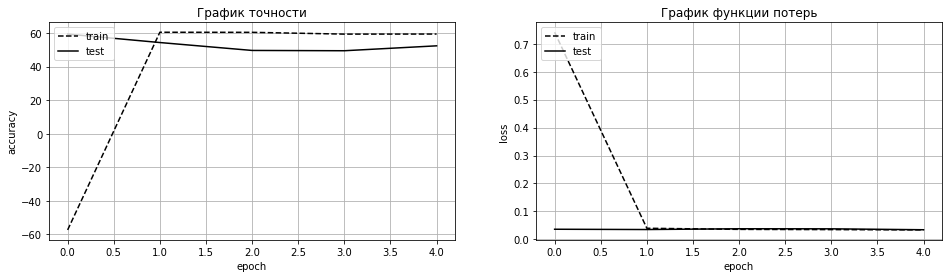

19/19 [==============================] - 0s 2ms/step - loss: 0.0352 - my_metric: 53.7394
 layer 1:tanh 
 layer 2:tanh 
 layer 3:sigmoid 
 layer 4:tanh 
 layer 5:tanh 
 epochs:5 
 opt:<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff1e7b22150>
Variant score : 53.73945236206055%


KeyboardInterrupt: ignored

In [ ]:
variant = 0   # Счётчик варианта ИНС
models = {}   # Словарь всех вариантов моделей ИНС



""" Метрика точности (доля верных предсказаний в сравнении с реальными значениями)"""
def my_metric(y_true, y_pred):
  return (100 - 100 * abs((y_true - y_pred) / y_true))



""" Цикл перебора комбинаций"""
for cmb in combinations:

  print("---------------------------------------------------------------------")
  print(f"Variant #{variant}")    # Номер варианта (комбинации)
  variant+=1



  #   Строение модели
  model = keras.Sequential()
  model.add(keras.Input(shape=(9,)))
  model.add(Dense(units = 9, activation=cmb[0]))
  model.add(Dense(units = 7, activation=cmb[1]))
  model.add(Dense(units = 5, activation=cmb[2]))
  model.add(Dense(units = 3, activation=cmb[3]))
  model.add(Dense(units = 1, activation=cmb[4]))

  model.compile(loss='mean_squared_error',optimizer = cmb[6],metrics=[my_metric])
  history=model.fit((np.array(x_train))[0:100],(np.array(y_train))[0:100],validation_split = 0.2,verbose=0,epochs = cmb[5])



  fig = plt.figure(figsize=(16, 4))
  ax = fig.add_subplot(121)
  ax.plot(history.history['my_metric'],'--',color='black')
  ax.plot(history.history['val_my_metric'],color='black')
  ax.set_title('График точности')
  ax.set_ylabel('accuracy')
  ax.set_xlabel('epoch')
  ax.legend(['train', 'test'], loc='upper left')
  ax.grid(True)


  ax2 = fig.add_subplot(122)
  ax2.plot(history.history['loss'],'--',color='black')
  ax2.plot(history.history['val_loss'],color='black')
  ax2.set_title('График функции потерь')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'test'], loc='upper left')
  ax2.grid(True)
  plt.show()

  pred = model.predict(np.array(x_test)) # Предсказанные данные

  #   Оценка точности варианта(комбинации) на тестовом наборе 
  mape = 1-sklearn.metrics.mean_absolute_percentage_error(y_test, pred)



  score = model.evaluate(np.array(x_test), np.array(y_test),batch_size=9)
  print(f" layer 1:{cmb[0]} \n layer 2:{cmb[1]} \n layer 3:{cmb[2]} \n layer 4:{cmb[3]} \n layer 5:{cmb[4]} \n epochs:{cmb[5]} \n opt:{cmb[6]}")
  
  print(f"Variant score : {mape*100}%")
  


  """ Сохранение модели и информации о модели"""
  models[variant]=[cmb[0],cmb[1],cmb[2],cmb[3],cmb[4],cmb[5],cmb[6],score[0],mape,history]
  model.save(f'model{variant}')
  print()
  print()
  print()

Таблица комбинаций параметров всех вариантов(комбинаций) ИНС и их результатов 

In [ ]:
params = pd.DataFrame.from_dict(models,orient='index').rename(columns={0:'layer_1',1:'layer_2',2:'layer_3',3:'layer_4',4:'layer_5',5:'Number of epochs',6:'Optimizer',7:'Loss',8:'Accuracy',9:'History'})
pd.set_option("display.max_rows", None, "display.max_columns", None)
params.sort_values('Accuracy').tail(10)

Лучший вариант набора параметров по минимальному значению функции ошибки

In [ ]:
#max_acc = params['Accuracy'].max()
#best_pr = params.iloc[params['Accuracy'].values.argmax()]
#best_index = params[['Accuracy']].idxmax()

best_pr = params.iloc[params['Loss'].values.argmin()]
best_index = params[['Loss']].idxmin()
best_pr

# Воссоздание лучшей модели

In [ ]:
""" Метрика точности (доля верных предсказаний в сравнении с реальными значениями)"""
def my_metric(y_true, y_pred):
  return (100 - 100 * abs((y_true - y_pred) / y_true))


# Загружаем оптимальную модель
model = keras.models.load_model(f'model{best_index[0]}',custom_objects={"my_metric": my_metric},compile = False)
   
pred = model.predict(np.array(x_test))
       
print(f"layer 1:{best_pr[0]} \n layer 2:{best_pr[1]} \n layer 3:{best_pr[2]} \n epochs:{best_pr[3]} \n opt:{best_pr[4]}")
  
print(f"Variant accuracy: {1-sklearn.metrics.mean_absolute_percentage_error(y_test,pred)}")

In [ ]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(121)
ax.plot(best_pr[8].history['my_metric'],'--',color='black')
ax.plot(best_pr[8].history['val_my_metric'],color='black')
ax.set_title('График точности')
ax.set_ylabel('Accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
ax.grid(True)


ax2 = fig.add_subplot(122)
ax2.plot(best_pr[8].history['loss'],'--',color = 'black')
ax2.plot(best_pr[8].history['val_loss'],color = 'black')
ax2.set_title('График функции потерь')
ax2.set_ylabel('Loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
ax2.grid(True)
plt.show()

# Кросс-валидация

0 221
-1 661
X_tr 441
X_t 221
662
7/7 [==============================] - 0s 1ms/step


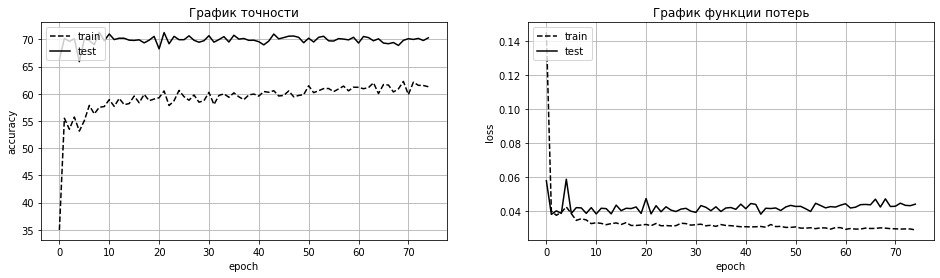

0 0
-1 661
X_tr 662
X_t 221
883
7/7 [==============================] - 0s 2ms/step


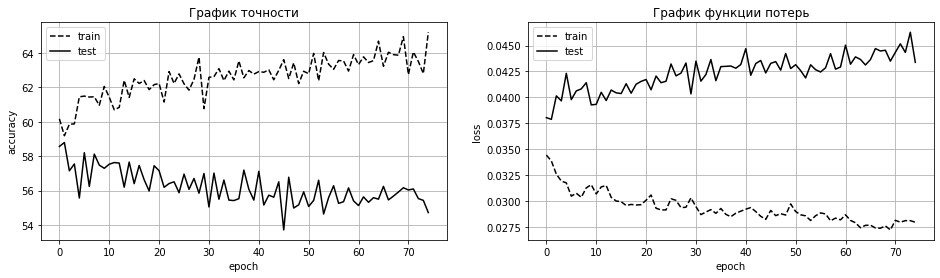

0 0
-1 441
X_tr 442
X_t 220
662
7/7 [==============================] - 0s 2ms/step


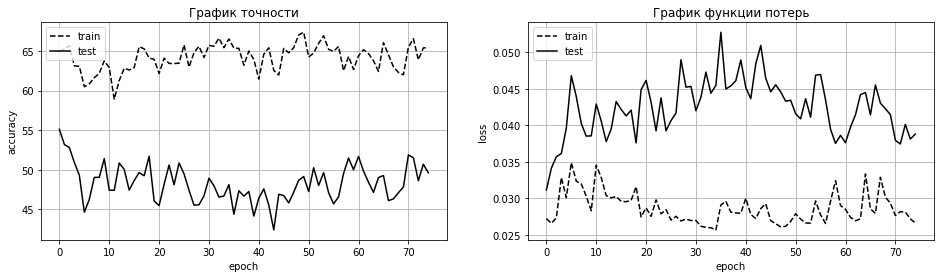

6/6 [==============================] - 0s 2ms/step
166
166
Variant accuracy: 0.49734246730804443


In [ ]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
 
test_x = np.concatenate([x_train, x_test]) 
def my_metric(y_true, y_pred):
  return (100 - 100 * abs((y_true - y_pred) / y_true))

 
#Implementing cross validation
 
k = 3
kf = KFold(n_splits=k, random_state=None)
model = keras.Sequential()
model.add(keras.Input(shape=(9,)))
model.add(Dense(units = 256, activation='tanh'))
model.add(Dense(units = 128, activation='tanh'))
model.add(Dense(units = 64, activation='tanh'))
model.add(Dense(units = 32, activation='tanh'))
model.add(Dense(units = 16, activation='tanh'))
model.add(Dense(units = 4, activation='tanh'))
model.add(Dense(units = 2, activation='tanh'))
model.add(Dense(units = 1, activation='tanh'))

model.compile(loss='mean_squared_error',optimizer = keras.optimizers.Adam(0.001),metrics=[my_metric])

 
for train_index , test_index in kf.split(test_x):
  print('0',train_index[0])
  print('-1',train_index[-1])
  X_train , X_test = test_x[train_index[0]:train_index[-1]+1],test_x[test_index[0]:test_index[-1]+1]
  Y_train , Y_test = y[train_index[0]:train_index[-1]+1] , y[test_index[0]:test_index[-1]+1]
  print('X_tr',len(X_train))
  print('X_t',len(X_test))
  print(len(X_train)+len(X_test))


  history=model.fit((np.array(X_train)),(np.array(Y_train)),validation_split = 0.2,verbose=0,epochs = 75) 

  pred_values = model.predict(X_test)
  fig = plt.figure(figsize=(16, 4))
  ax = fig.add_subplot(121)
  ax.plot(history.history['my_metric'],'--',color='black')
  ax.plot(history.history['val_my_metric'],color='black')
  ax.set_title('График точности')
  ax.set_ylabel('accuracy')
  ax.set_xlabel('epoch')
  ax.legend(['train', 'test'], loc='upper left')
  ax.grid(True)

  ax2 = fig.add_subplot(122)
  ax2.plot(history.history['loss'],'--',color='black')
  ax2.plot(history.history['val_loss'],color='black')
  ax2.set_title('График функции потерь')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'test'], loc='upper left')
  ax2.grid(True)
  plt.show()

   
pred = model.predict(np.array(x_test))
print(len(x_test))
print(len(y_test))
print(f"Variant accuracy: {1-sklearn.metrics.mean_absolute_percentage_error(y_test,pred)}")
     


# Конечная версия модели

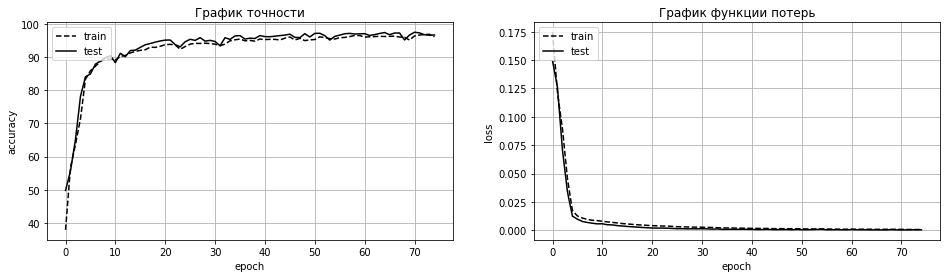

6/6 [==============================] - 0s 3ms/step
Variant accuracy: 0.9662983790040016


In [ ]:
""" Метрика точности (доля верных предсказаний в сравнении с реальными значениями)"""
def my_metric(y_true, y_pred):
  return (100 - 100 * abs((y_true - y_pred) / y_true))


# Загружаем оптимальную модель
model = keras.Sequential()
model.add(keras.Input(shape=(9,)))
model.add(Dense(units = 256, activation='tanh'))
model.add(Dense(units = 128, activation='tanh'))
model.add(Dense(units = 64, activation='tanh'))
model.add(Dense(units = 32, activation='tanh'))
model.add(Dense(units = 16, activation='tanh'))
model.add(Dense(units = 4, activation='tanh'))
model.add(Dense(units = 2, activation='tanh'))
model.add(Dense(units = 1, activation='tanh'))

model.compile(loss='mean_squared_error',optimizer = keras.optimizers.Adam(0.001),metrics=[my_metric])
history=model.fit((np.array(x_train))[0:600],(np.array(y_train))[0:600],validation_split = 0.2,verbose=0,epochs = 75)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(121)
ax.plot(history.history['my_metric'],'--',color='black')
ax.plot(history.history['val_my_metric'],color='black')
ax.set_title('График точности')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
ax.grid(True)


ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'],'--',color='black')
ax2.plot(history.history['val_loss'],color='black')
ax2.set_title('График функции потерь')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
ax2.grid(True)
plt.show()

   
pred = model.predict(np.array(x_test))
print(f"Variant accuracy: {1-sklearn.metrics.mean_absolute_percentage_error(y_test,pred)}")

In [ ]:
#   Описание модели
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,show_layer_activations = True)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               2560      
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 4)                 68        
                                                                 
 dense_30 (Dense)            (None, 2)                

# Таблица предсказаний ИНС в сравнении с реальными данными и их абсолютная разница

In [ ]:
y_pred = []
y_real = []
mae = []
perc = []
for i in range(len(x_train)):
  y_pred.append(model.predict(x_train[[i]]))
  y_real.append(y_train[i])
for i in range(len(x_test)):
  y_pred.append(model.predict(x_test[[i]]))
  y_real.append(y_test[i])  
for i in range(len(y_pred)):
  mae.append(abs(y_real[i]-y_pred[i]))
  perc.append(100*mae[i]/y_real[i])

test = pd.DataFrame()
test['Предсказанные']=y_pred
test['Предсказанные'] = test['Предсказанные'].str.get(0).str.get(0)
test['Истинные']=y_real
test['Истинные']=test['Истинные'].str.get(0)
test['Ошибка'] = mae
test['Ошибка'] = test['Ошибка'].str.get(0).str.get(0)
test['Отклонение %'] = perc
test['Отклонение %'] = test['Отклонение %'].str.get(0)
test = test.astype(float)
pd.set_option("display.max_rows", None, "display.max_columns", None)
test

1/1 [==============================] - 0s 36ms/step


,Предсказанные,Истинные,Ошибка,Отклонение %
0,0.822271,0.881200,0.058930,6.687415
1,0.663123,0.639456,0.023667,3.701063
2,0.811762,0.822423,0.010661,1.296343
3,0.812757,0.822623,0.009867,1.199399
4,0.544942,0.553100,0.008158,1.474932
5,0.579600,0.592600,0.013000,2.193765
6,0.626832,0.636750,0.009918,1.557556
7,0.535767,0.526600,0.009167,1.740849
8,0.302285,0.225000,0.077285,34.349060
9,0.390771,0.399700,0.008929,2.233855


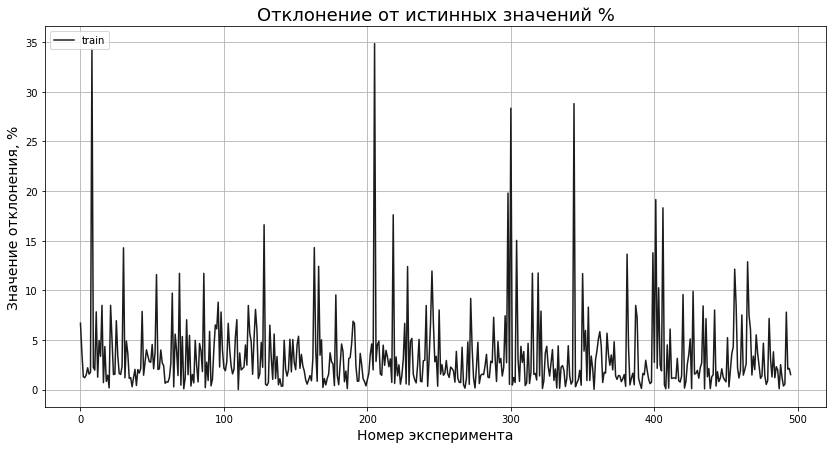

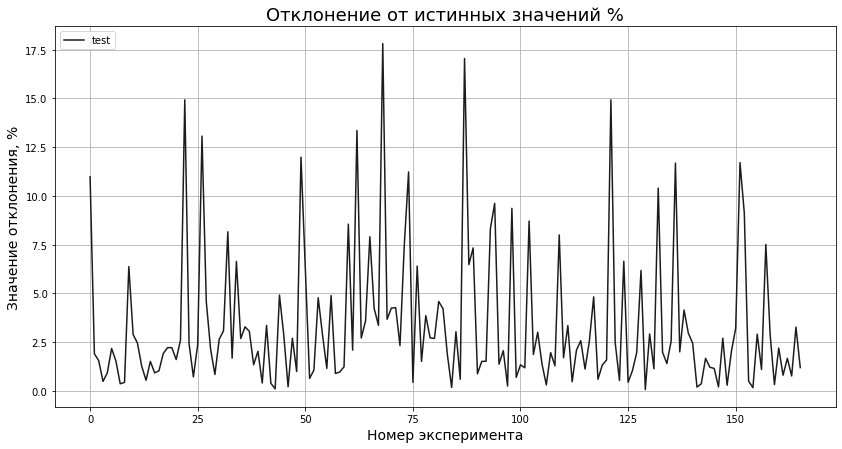

In [ ]:
# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_train))),test["Отклонение %"].head(len(x_train)),color='#1C1C1C')
plt.title('Отклонение от истинных значений %', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['train'], loc='upper left')
plt.grid(True)
plt.savefig("train.png")
plt.show()

# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_test))),test["Отклонение %"].tail(len(y_test)),color='#1C1C1C')
plt.title('Отклонение от истинных значений %', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['test'], loc='upper left')
plt.grid(True)
plt.savefig("test.png")
plt.show()

* Выгрузка результатов

In [ ]:
test.to_excel("out.xlsx")